### Database manifestação - Sem tratamento

In [3]:
import spacy
import nltk

nltk.download('stopwords')

nlp = spacy.load('pt_core_news_lg')
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

def pre_processamento(texto):
    doc = nlp(texto)  # mantém caixa original

    tokens = []
    ent_by_start = {ent.start: ent for ent in doc.ents}

    i = 0
    while i < len(doc):
        if i in ent_by_start:
            ent = ent_by_start[i]
            ent_text = ent.text
            if ent_text.lower() not in stopwords:  # compara versão minúscula
                tokens.append(ent_text)
            i = ent.end
        else:
            token = doc[i]
            if token.is_alpha and token.text.lower() not in stopwords:
                tokens.append(token.text)
            i += 1

    return tokens


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


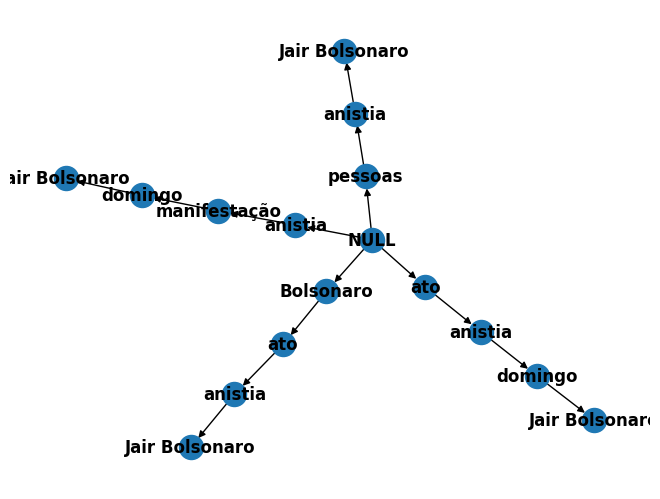

In [6]:
from trieofrules import trieofrules
import csv
import re

valores_coluna = []

with open('datasets/database_manifestacao_bolsonaro_pro_anistia.csv', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    for line in reader:
      valores_coluna.append(line['Texto'])
      
valores = []
for texto in valores_coluna:
      result = pre_processamento(texto)
      valores.append(result)

#supported algorithms: FP-max, FP-growth, Apriori
TOR = trieofrules(data = valores, alg='FP-max', min_support=0.8) 
TOR.draw()
TOR.save_graph(filename = 'outputs/manifest.graphml') 